In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: LUV
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


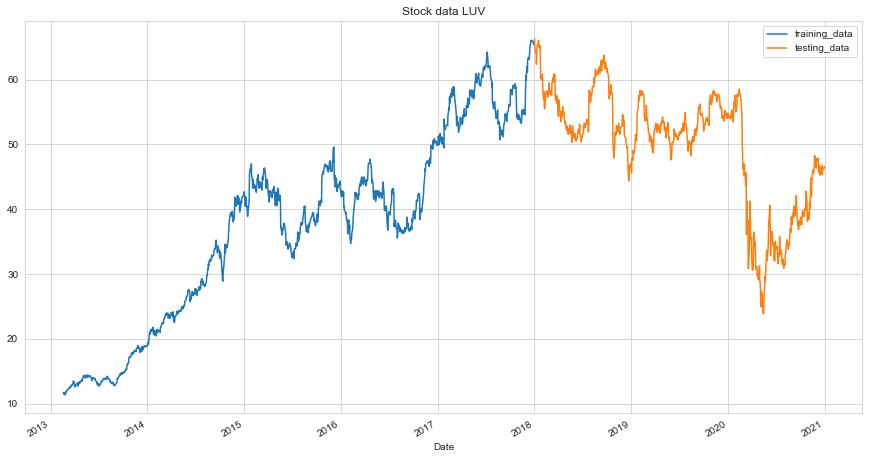

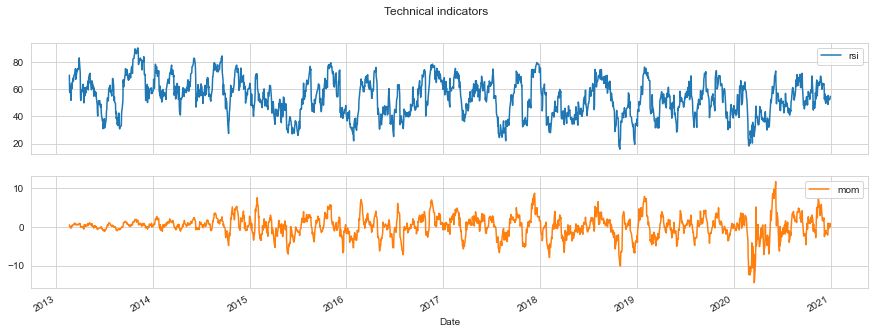

In [2]:
stock_name = 'luv'.upper()
industry = 'Industrial'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1825.94, duration: 0:00:00.515114
episode: 2/2000, episode end value: 1803.16, duration: 0:00:00.486427
episode: 3/2000, episode end value: 1811.26, duration: 0:00:00.447941
episode: 4/2000, episode end value: 1808.06, duration: 0:00:00.419422
episode: 5/2000, episode end value: 1840.65, duration: 0:00:00.438836
episode: 6/2000, episode end value: 1823.22, duration: 0:00:00.406043
episode: 7/2000, episode end value: 1839.47, duration: 0:00:00.452064
episode: 8/2000, episode end value: 1807.67, duration: 0:00:00.417059
episode: 9/2000, episode end value: 1797.36, duration: 0:00:00.432270
episode: 10/2000, episode end value: 1819.19, duration: 0:00:00.373959
episode: 11/2000, episode end value: 1809.56, duration: 0:00:00.385539
episode: 12/2000, episode end value: 1791.81, duration: 0:00:00.385364
episode: 13/2000, episode end value: 1837.17, duration: 0:00:00.414712
episode: 14/2000, episode end value: 1982.19, duration: 0:00:00.354410
episode: 15/200

episode: 117/2000, episode end value: 1772.48, duration: 0:00:00.490393
episode: 118/2000, episode end value: 1815.74, duration: 0:00:00.430024
episode: 119/2000, episode end value: 1824.61, duration: 0:00:00.500227
episode: 120/2000, episode end value: 1816.39, duration: 0:00:00.441274
episode: 121/2000, episode end value: 1785.39, duration: 0:00:00.436671
episode: 122/2000, episode end value: 1824.70, duration: 0:00:00.396096
episode: 123/2000, episode end value: 1812.58, duration: 0:00:00.444071
episode: 124/2000, episode end value: 1776.23, duration: 0:00:00.390582
episode: 125/2000, episode end value: 1804.96, duration: 0:00:00.518120
episode: 126/2000, episode end value: 1817.59, duration: 0:00:00.481110
episode: 127/2000, episode end value: 1822.53, duration: 0:00:00.501116
episode: 128/2000, episode end value: 1820.63, duration: 0:00:00.455600
episode: 129/2000, episode end value: 1830.13, duration: 0:00:00.403649
episode: 130/2000, episode end value: 1826.22, duration: 0:00:00

episode: 231/2000, episode end value: 1837.75, duration: 0:00:00.551524
episode: 232/2000, episode end value: 1805.32, duration: 0:00:00.427192
episode: 233/2000, episode end value: 1783.01, duration: 0:00:00.359801
episode: 234/2000, episode end value: 1820.29, duration: 0:00:00.448186
episode: 235/2000, episode end value: 1839.23, duration: 0:00:00.414465
episode: 236/2000, episode end value: 1756.02, duration: 0:00:00.384521
episode: 237/2000, episode end value: 1790.80, duration: 0:00:00.468896
episode: 238/2000, episode end value: 1837.26, duration: 0:00:00.350809
episode: 239/2000, episode end value: 1807.78, duration: 0:00:00.359256
episode: 240/2000, episode end value: 1809.78, duration: 0:00:00.485388
episode: 241/2000, episode end value: 1802.28, duration: 0:00:00.474785
episode: 242/2000, episode end value: 1832.37, duration: 0:00:00.501885
episode: 243/2000, episode end value: 1818.72, duration: 0:00:00.505606
episode: 244/2000, episode end value: 1791.23, duration: 0:00:00

episode: 345/2000, episode end value: 1839.80, duration: 0:00:00.435232
episode: 346/2000, episode end value: 1808.02, duration: 0:00:00.433150
episode: 347/2000, episode end value: 1814.10, duration: 0:00:00.475414
episode: 348/2000, episode end value: 1799.31, duration: 0:00:00.424426
episode: 349/2000, episode end value: 1815.73, duration: 0:00:00.401937
episode: 350/2000, episode end value: 1819.86, duration: 0:00:00.392557
episode: 351/2000, episode end value: 1781.35, duration: 0:00:00.417686
episode: 352/2000, episode end value: 1822.06, duration: 0:00:00.437343
episode: 353/2000, episode end value: 1804.32, duration: 0:00:00.415739
episode: 354/2000, episode end value: 1775.50, duration: 0:00:00.442105
episode: 355/2000, episode end value: 1795.25, duration: 0:00:00.348237
episode: 356/2000, episode end value: 1767.72, duration: 0:00:00.377659
episode: 357/2000, episode end value: 1800.13, duration: 0:00:00.437149
episode: 358/2000, episode end value: 1767.44, duration: 0:00:00

episode: 459/2000, episode end value: 1776.03, duration: 0:00:00.412372
episode: 460/2000, episode end value: 1815.41, duration: 0:00:00.410317
episode: 461/2000, episode end value: 1802.14, duration: 0:00:00.390031
episode: 462/2000, episode end value: 1799.41, duration: 0:00:00.395748
episode: 463/2000, episode end value: 1810.12, duration: 0:00:00.416391
episode: 464/2000, episode end value: 1810.19, duration: 0:00:00.464330
episode: 465/2000, episode end value: 1803.72, duration: 0:00:00.403517
episode: 466/2000, episode end value: 1813.66, duration: 0:00:00.468586
episode: 467/2000, episode end value: 1859.28, duration: 0:00:00.427866
episode: 468/2000, episode end value: 1824.36, duration: 0:00:00.466570
episode: 469/2000, episode end value: 1762.01, duration: 0:00:00.359050
episode: 470/2000, episode end value: 1809.54, duration: 0:00:00.400646
episode: 471/2000, episode end value: 1821.95, duration: 0:00:00.424355
episode: 472/2000, episode end value: 1806.61, duration: 0:00:00

episode: 573/2000, episode end value: 1816.58, duration: 0:00:00.426755
episode: 574/2000, episode end value: 1802.09, duration: 0:00:00.395688
episode: 575/2000, episode end value: 1804.57, duration: 0:00:00.492181
episode: 576/2000, episode end value: 1816.30, duration: 0:00:00.363678
episode: 577/2000, episode end value: 1818.43, duration: 0:00:00.402595
episode: 578/2000, episode end value: 1823.24, duration: 0:00:00.423853
episode: 579/2000, episode end value: 1807.62, duration: 0:00:00.378911
episode: 580/2000, episode end value: 1804.60, duration: 0:00:00.501251
episode: 581/2000, episode end value: 1811.73, duration: 0:00:00.586686
episode: 582/2000, episode end value: 1824.49, duration: 0:00:00.406019
episode: 583/2000, episode end value: 1840.52, duration: 0:00:00.459997
episode: 584/2000, episode end value: 1802.68, duration: 0:00:00.412691
episode: 585/2000, episode end value: 1801.39, duration: 0:00:00.377781
episode: 586/2000, episode end value: 1836.24, duration: 0:00:00

episode: 687/2000, episode end value: 1823.00, duration: 0:00:00.479451
episode: 688/2000, episode end value: 1843.20, duration: 0:00:00.482481
episode: 689/2000, episode end value: 1816.50, duration: 0:00:00.397082
episode: 690/2000, episode end value: 1816.80, duration: 0:00:00.451584
episode: 691/2000, episode end value: 1825.65, duration: 0:00:00.350862
episode: 692/2000, episode end value: 1783.24, duration: 0:00:00.444268
episode: 693/2000, episode end value: 1846.27, duration: 0:00:00.394861
episode: 694/2000, episode end value: 1810.72, duration: 0:00:00.349224
episode: 695/2000, episode end value: 1844.36, duration: 0:00:00.372110
episode: 696/2000, episode end value: 1780.95, duration: 0:00:00.413554
episode: 697/2000, episode end value: 1856.25, duration: 0:00:00.450505
episode: 698/2000, episode end value: 1822.27, duration: 0:00:00.529825
episode: 699/2000, episode end value: 1771.60, duration: 0:00:00.370950
episode: 700/2000, episode end value: 1805.91, duration: 0:00:00

episode: 801/2000, episode end value: 1802.40, duration: 0:00:00.440361
episode: 802/2000, episode end value: 1810.80, duration: 0:00:00.361660
episode: 803/2000, episode end value: 1767.33, duration: 0:00:00.398233
episode: 804/2000, episode end value: 1819.87, duration: 0:00:00.432230
episode: 805/2000, episode end value: 1766.42, duration: 0:00:00.407867
episode: 806/2000, episode end value: 1774.99, duration: 0:00:00.358023
episode: 807/2000, episode end value: 1778.59, duration: 0:00:00.463025
episode: 808/2000, episode end value: 1802.69, duration: 0:00:00.393660
episode: 809/2000, episode end value: 1825.93, duration: 0:00:00.453206
episode: 810/2000, episode end value: 1824.85, duration: 0:00:00.390500
episode: 811/2000, episode end value: 1799.18, duration: 0:00:00.430752
episode: 812/2000, episode end value: 1808.20, duration: 0:00:00.424753
episode: 813/2000, episode end value: 1801.27, duration: 0:00:00.456566
episode: 814/2000, episode end value: 1787.71, duration: 0:00:00

episode: 915/2000, episode end value: 1831.91, duration: 0:00:00.375309
episode: 916/2000, episode end value: 1811.28, duration: 0:00:00.404839
episode: 917/2000, episode end value: 1759.85, duration: 0:00:00.433107
episode: 918/2000, episode end value: 1805.02, duration: 0:00:00.430337
episode: 919/2000, episode end value: 1774.52, duration: 0:00:00.447465
episode: 920/2000, episode end value: 1753.16, duration: 0:00:00.394933
episode: 921/2000, episode end value: 1826.24, duration: 0:00:00.477291
episode: 922/2000, episode end value: 1802.68, duration: 0:00:00.456143
episode: 923/2000, episode end value: 1795.71, duration: 0:00:00.438009
episode: 924/2000, episode end value: 1776.57, duration: 0:00:00.394585
episode: 925/2000, episode end value: 1802.05, duration: 0:00:00.425929
episode: 926/2000, episode end value: 1783.83, duration: 0:00:00.487494
episode: 927/2000, episode end value: 1795.80, duration: 0:00:00.388952
episode: 928/2000, episode end value: 1818.67, duration: 0:00:00

episode: 1029/2000, episode end value: 1762.80, duration: 0:00:00.369743
episode: 1030/2000, episode end value: 1768.60, duration: 0:00:00.440861
episode: 1031/2000, episode end value: 1773.48, duration: 0:00:00.396938
episode: 1032/2000, episode end value: 1815.48, duration: 0:00:00.435651
episode: 1033/2000, episode end value: 1812.22, duration: 0:00:00.419128
episode: 1034/2000, episode end value: 1761.99, duration: 0:00:00.482314
episode: 1035/2000, episode end value: 1845.91, duration: 0:00:00.496224
episode: 1036/2000, episode end value: 1801.59, duration: 0:00:00.394777
episode: 1037/2000, episode end value: 1811.21, duration: 0:00:00.435780
episode: 1038/2000, episode end value: 1806.43, duration: 0:00:00.439527
episode: 1039/2000, episode end value: 1803.02, duration: 0:00:00.455671
episode: 1040/2000, episode end value: 1771.87, duration: 0:00:00.458035
episode: 1041/2000, episode end value: 1811.23, duration: 0:00:00.421601
episode: 1042/2000, episode end value: 1756.16, dur

episode: 1142/2000, episode end value: 1801.38, duration: 0:00:00.465358
episode: 1143/2000, episode end value: 1821.68, duration: 0:00:00.511174
episode: 1144/2000, episode end value: 1809.58, duration: 0:00:00.460839
episode: 1145/2000, episode end value: 1805.46, duration: 0:00:00.421959
episode: 1146/2000, episode end value: 1807.35, duration: 0:00:00.408606
episode: 1147/2000, episode end value: 1837.63, duration: 0:00:00.374893
episode: 1148/2000, episode end value: 1805.82, duration: 0:00:00.310515
episode: 1149/2000, episode end value: 1790.52, duration: 0:00:00.425082
episode: 1150/2000, episode end value: 1770.19, duration: 0:00:00.366939
episode: 1151/2000, episode end value: 1804.92, duration: 0:00:00.445632
episode: 1152/2000, episode end value: 1825.73, duration: 0:00:00.464468
episode: 1153/2000, episode end value: 1760.60, duration: 0:00:00.429386
episode: 1154/2000, episode end value: 1808.36, duration: 0:00:00.464283
episode: 1155/2000, episode end value: 1796.40, dur

episode: 1255/2000, episode end value: 1769.29, duration: 0:00:00.439657
episode: 1256/2000, episode end value: 1805.59, duration: 0:00:00.401319
episode: 1257/2000, episode end value: 1815.83, duration: 0:00:00.533572
episode: 1258/2000, episode end value: 1848.48, duration: 0:00:00.478020
episode: 1259/2000, episode end value: 1837.99, duration: 0:00:00.387082
episode: 1260/2000, episode end value: 1804.74, duration: 0:00:00.392391
episode: 1261/2000, episode end value: 1823.09, duration: 0:00:00.415122
episode: 1262/2000, episode end value: 1817.23, duration: 0:00:00.391063
episode: 1263/2000, episode end value: 1819.09, duration: 0:00:00.482222
episode: 1264/2000, episode end value: 1819.76, duration: 0:00:00.452295
episode: 1265/2000, episode end value: 1802.75, duration: 0:00:00.377777
episode: 1266/2000, episode end value: 1817.77, duration: 0:00:00.386716
episode: 1267/2000, episode end value: 1771.73, duration: 0:00:00.370325
episode: 1268/2000, episode end value: 1825.08, dur

episode: 1368/2000, episode end value: 1766.64, duration: 0:00:00.418332
episode: 1369/2000, episode end value: 1789.63, duration: 0:00:00.435123
episode: 1370/2000, episode end value: 1795.82, duration: 0:00:00.510901
episode: 1371/2000, episode end value: 1811.47, duration: 0:00:00.412865
episode: 1372/2000, episode end value: 1775.32, duration: 0:00:00.405151
episode: 1373/2000, episode end value: 1801.32, duration: 0:00:00.395116
episode: 1374/2000, episode end value: 1842.68, duration: 0:00:00.391451
episode: 1375/2000, episode end value: 1777.67, duration: 0:00:00.402761
episode: 1376/2000, episode end value: 1804.07, duration: 0:00:00.437602
episode: 1377/2000, episode end value: 1808.00, duration: 0:00:00.444928
episode: 1378/2000, episode end value: 1814.31, duration: 0:00:00.441453
episode: 1379/2000, episode end value: 1787.61, duration: 0:00:00.402355
episode: 1380/2000, episode end value: 1777.55, duration: 0:00:00.485403
episode: 1381/2000, episode end value: 1797.09, dur

episode: 1481/2000, episode end value: 1808.54, duration: 0:00:00.350524
episode: 1482/2000, episode end value: 1798.20, duration: 0:00:00.389689
episode: 1483/2000, episode end value: 1788.46, duration: 0:00:00.389672
episode: 1484/2000, episode end value: 1800.57, duration: 0:00:00.360678
episode: 1485/2000, episode end value: 1757.14, duration: 0:00:00.339299
episode: 1486/2000, episode end value: 1763.71, duration: 0:00:00.323064
episode: 1487/2000, episode end value: 1777.37, duration: 0:00:00.340485
episode: 1488/2000, episode end value: 1823.60, duration: 0:00:00.352294
episode: 1489/2000, episode end value: 1811.50, duration: 0:00:00.361396
episode: 1490/2000, episode end value: 1781.66, duration: 0:00:00.412809
episode: 1491/2000, episode end value: 1812.19, duration: 0:00:00.385628
episode: 1492/2000, episode end value: 1844.88, duration: 0:00:00.333587
episode: 1493/2000, episode end value: 1810.28, duration: 0:00:00.358310
episode: 1494/2000, episode end value: 1815.59, dur

episode: 1594/2000, episode end value: 1803.12, duration: 0:00:00.419825
episode: 1595/2000, episode end value: 1852.44, duration: 0:00:00.310504
episode: 1596/2000, episode end value: 1825.89, duration: 0:00:00.363849
episode: 1597/2000, episode end value: 1815.81, duration: 0:00:00.420234
episode: 1598/2000, episode end value: 1850.38, duration: 0:00:00.354931
episode: 1599/2000, episode end value: 1814.43, duration: 0:00:00.352352
episode: 1600/2000, episode end value: 1805.41, duration: 0:00:00.394545
episode: 1601/2000, episode end value: 1794.81, duration: 0:00:00.360899
episode: 1602/2000, episode end value: 1824.13, duration: 0:00:00.377469
episode: 1603/2000, episode end value: 1798.97, duration: 0:00:00.346743
episode: 1604/2000, episode end value: 1809.61, duration: 0:00:00.348145
episode: 1605/2000, episode end value: 1828.59, duration: 0:00:00.471685
episode: 1606/2000, episode end value: 1814.91, duration: 0:00:00.387357
episode: 1607/2000, episode end value: 1870.94, dur

episode: 1707/2000, episode end value: 1802.45, duration: 0:00:00.318877
episode: 1708/2000, episode end value: 1822.28, duration: 0:00:00.344510
episode: 1709/2000, episode end value: 1803.06, duration: 0:00:00.333832
episode: 1710/2000, episode end value: 1772.76, duration: 0:00:00.342994
episode: 1711/2000, episode end value: 1814.55, duration: 0:00:00.393701
episode: 1712/2000, episode end value: 1811.78, duration: 0:00:00.352382
episode: 1713/2000, episode end value: 1818.69, duration: 0:00:00.338054
episode: 1714/2000, episode end value: 1812.31, duration: 0:00:00.341507
episode: 1715/2000, episode end value: 1756.79, duration: 0:00:00.297649
episode: 1716/2000, episode end value: 1813.54, duration: 0:00:00.322088
episode: 1717/2000, episode end value: 1825.11, duration: 0:00:00.315794
episode: 1718/2000, episode end value: 1774.83, duration: 0:00:00.375768
episode: 1719/2000, episode end value: 1836.00, duration: 0:00:00.340650
episode: 1720/2000, episode end value: 1800.16, dur

episode: 1820/2000, episode end value: 1777.42, duration: 0:00:00.277912
episode: 1821/2000, episode end value: 1818.68, duration: 0:00:00.257789
episode: 1822/2000, episode end value: 1809.82, duration: 0:00:00.260141
episode: 1823/2000, episode end value: 1760.59, duration: 0:00:00.232112
episode: 1824/2000, episode end value: 1795.48, duration: 0:00:00.273327
episode: 1825/2000, episode end value: 1824.31, duration: 0:00:00.259315
episode: 1826/2000, episode end value: 1827.77, duration: 0:00:00.269761
episode: 1827/2000, episode end value: 1812.06, duration: 0:00:00.272587
episode: 1828/2000, episode end value: 1819.78, duration: 0:00:00.279984
episode: 1829/2000, episode end value: 1814.82, duration: 0:00:00.248912
episode: 1830/2000, episode end value: 1762.28, duration: 0:00:00.259880
episode: 1831/2000, episode end value: 1822.67, duration: 0:00:00.275384
episode: 1832/2000, episode end value: 1822.65, duration: 0:00:00.272813
episode: 1833/2000, episode end value: 1807.33, dur

episode: 1933/2000, episode end value: 1782.88, duration: 0:00:00.239304
episode: 1934/2000, episode end value: 1793.42, duration: 0:00:00.248223
episode: 1935/2000, episode end value: 1805.39, duration: 0:00:00.233632
episode: 1936/2000, episode end value: 1797.54, duration: 0:00:00.262759
episode: 1937/2000, episode end value: 1781.73, duration: 0:00:00.245106
episode: 1938/2000, episode end value: 1779.19, duration: 0:00:00.261086
episode: 1939/2000, episode end value: 1827.35, duration: 0:00:00.262316
episode: 1940/2000, episode end value: 1771.46, duration: 0:00:00.235304
episode: 1941/2000, episode end value: 1814.18, duration: 0:00:00.265322
episode: 1942/2000, episode end value: 1820.39, duration: 0:00:00.275771
episode: 1943/2000, episode end value: 1807.68, duration: 0:00:00.242466
episode: 1944/2000, episode end value: 1814.02, duration: 0:00:00.278829
episode: 1945/2000, episode end value: 1812.59, duration: 0:00:00.269580
episode: 1946/2000, episode end value: 1875.11, dur

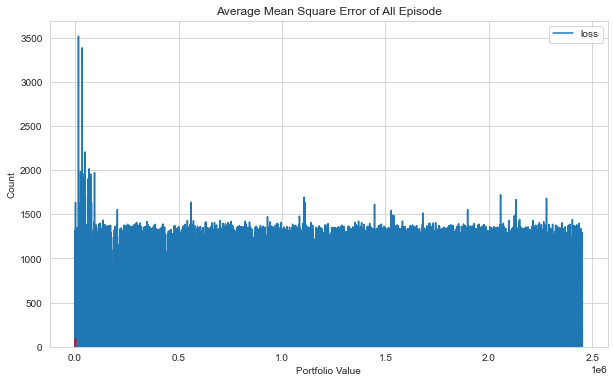

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

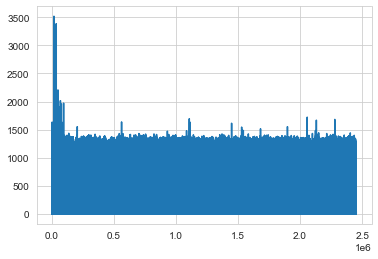

In [5]:
plt.plot(agent.model.losses)

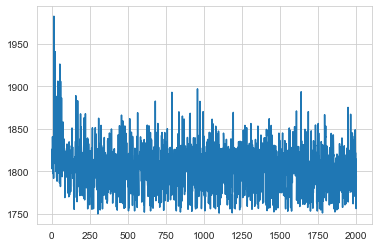

In [6]:
plt.plot(portfolio_value)

episode end value: 1118.46, duration: 0:00:00.124787
Sell: 373 times, Buy: 380 times


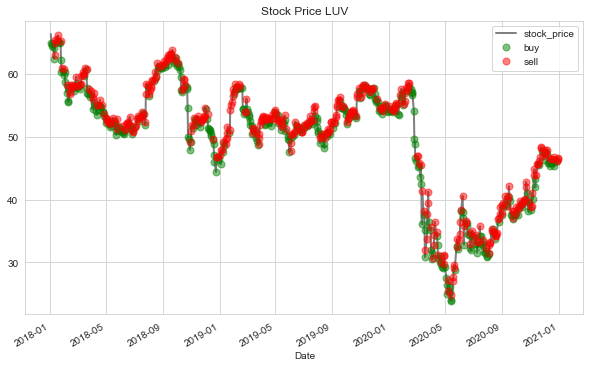

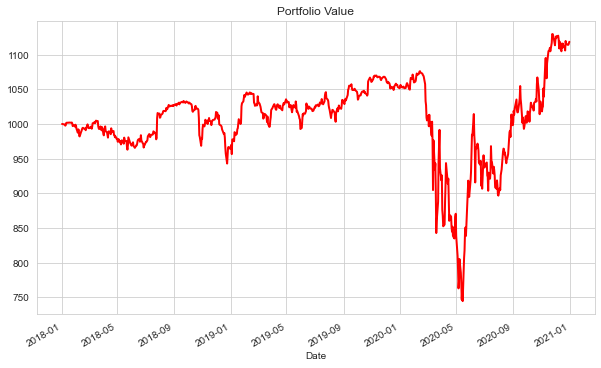

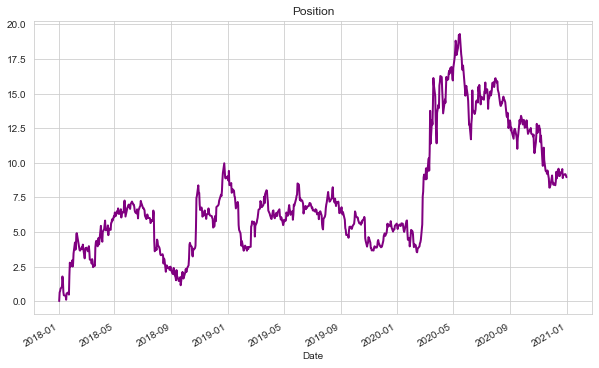

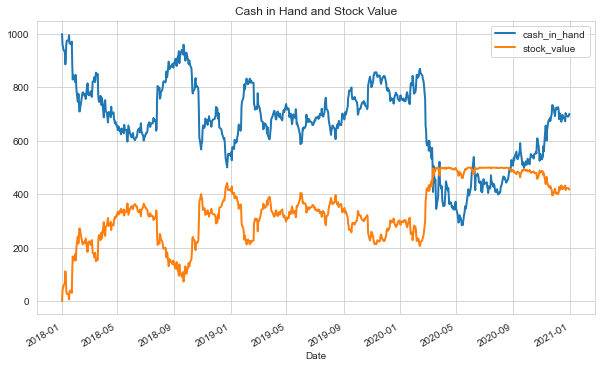

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: LUV
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 3.80 %
Volatility: 0.1980
shape ratio: 0.1364
Maximun drawdown: -30.79 %
Calmar ratio: 0.1235
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -11.08 %
Volatility (benchmark): 0.4165
shape ratio: -0.2924
Maximun drawdown: -63.87 %
Calmar ratio (benchmark): -0.1734


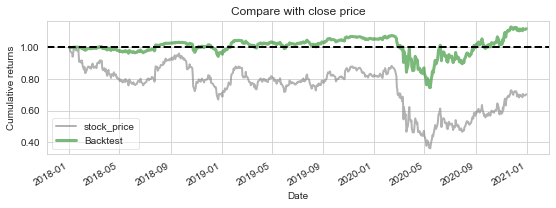

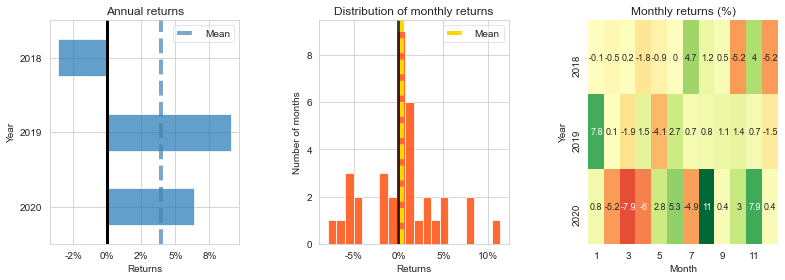

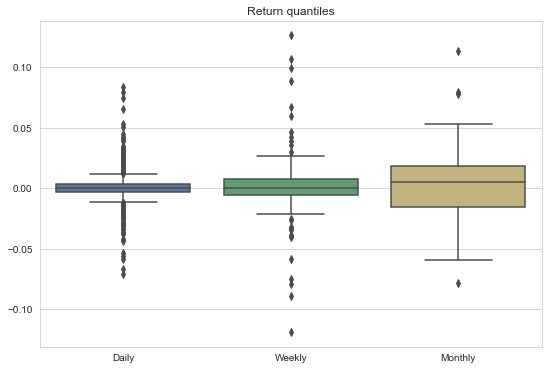

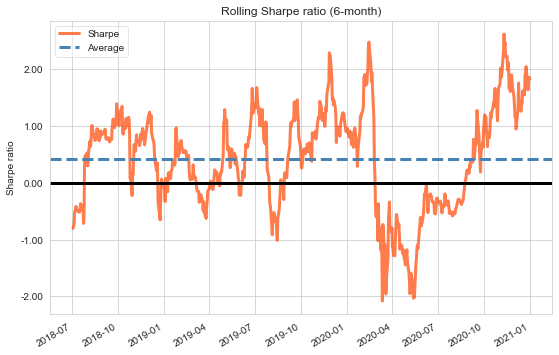

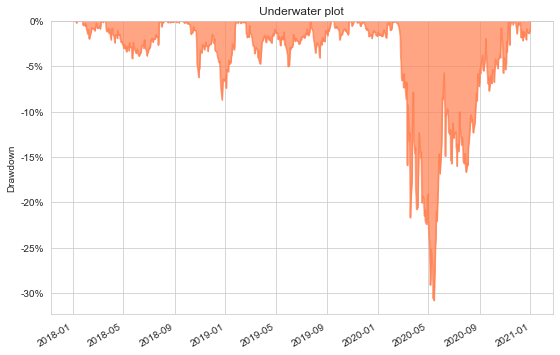

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')